In [87]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import pykitti

In [88]:
basedir = "/home/lrabuzin/ETH/Sem3/3DV/KITTI/raw_data"
date = '2011_09_26'
drive = '0019'
camera = 2

data = pykitti.raw(basedir, date, drive)

In [89]:
rotmat1 = np.transpose(np.array([[-1, 0, 0, 0],
                    [0, 1, 0, 0],
                    [0, 0, 1, 0],
                    [0, 0, 0, 1]]))
# rotmat2 = np.array([[1, 0, 0, 0],
#                     [0, 0, -1, 0],
#                     [0, 1, 0, 0],
#                     [0, 0, 0, 1]])

In [19]:
# rotmat2.dot(rotmat1)

array([[ 0,  0, -1,  0],
       [-1,  0,  0,  0],
       [ 0,  1,  0,  0],
       [ 0,  0,  0,  1]])

In [90]:
def get_frame_dict_fixed(file_path, data,i):

    transform_matrix = rotmat1.dot(data.oxts[i].T_w_imu.dot(np.linalg.inv(data.calib.T_cam2_imu)))
    # transform_matrix = data.calib.T_cam2_imu.dot(data.oxts[i].T_w_imu)
        
    return  {
            "file_path": file_path,
            "transform_matrix": [ list(transform_matrix[i]) for i in range(4)]
        }

In [91]:
folder = f'{basedir}/{date}'
cam = folder + '/calib_cam_to_cam.txt'

with open(cam) as file:
    lines = [line.rstrip() for line in file]


all_calibs = {line.split()[0][:-1]:line.split()[1:] for line in lines}


d = {
    "fl_x": float(all_calibs[f'P_rect_0{camera}'][0]),
    "fl_y": float(all_calibs[f'P_rect_0{camera}'][5]),
    "cx": float(all_calibs[f'P_rect_0{camera}'][2]),
    "cy": float(all_calibs[f'P_rect_0{camera}'][6]),
    "w": 1242,
    "h": 375,
    "camera_model": "OPENCV",
    "k1": 0,
    "k2": 0,
    "p1": 0,
    "p2": 0
}

save_loc = f'{basedir}/{date}/{date}_drive_{drive}_sync/'

folder = f"image_0{camera}/data"

full_folder_path = os.path.join(save_loc, folder)
all_frames = sorted(os.listdir(full_folder_path))

frame_dicts = []

for i, frame in enumerate(all_frames):
    frame_dicts.append(get_frame_dict_fixed(os.path.join(folder, frame), data,i))

d["frames"] = frame_dicts

with open(os.path.join(save_loc,'transforms_nb.json'),'w') as f:
    json.dump(d,f,indent=4)

In [85]:
xs = []
ys = []
zs = []

for frame in d["frames"]:
    tm = frame["transform_matrix"]
    xs.append(tm[0][3])
    ys.append(tm[1][3])
    zs.append(tm[2][3])

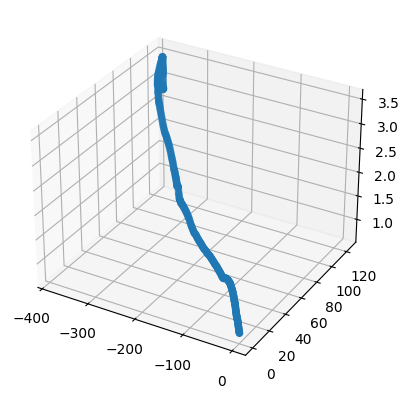

In [68]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xs, ys, zs)

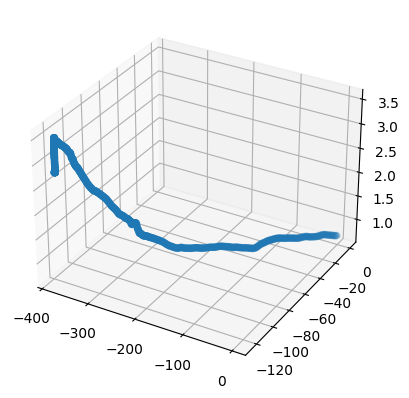

In [72]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xs, ys, zs)

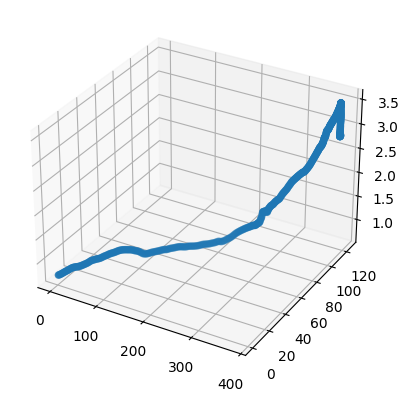

In [86]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xs, ys, zs)